## Project 2

The dataset contains 18,000 objects, uniformly distributed across 36 classes, with 500 instances per class.

Each class corresponds to a unique combination of two parameters:

        • p ∈ {0, 1, 2, 3, 4, 5}
        • q ∈ {0, 1, 2, 3, 4, 5}

These combinations result in 6 × 6 = 36 distinct (p, q) pairs, which form the class labels. Each data instance
includes some tags and parameters, namely 

        • tag: Identifier or label of the sample.

        • p, q, w, j, T: Parameters associated with each object (with p and q being the class-defining features).

        • ACF Features (41 values), representing the autocorrelation function at different lags.

        • PACF Features (41 values), representing the partial autocorrelation function at different lags.

In total, each object is described by 88 features. 

In [2]:
# import relevant libraries
# other necessary libraries will be imported as needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataset
df = pd.read_excel('ACF_PACF_results.xlsx')

Get overral structure of the dataset and check for missing values: (it was known there were no missing values, but either way looks more complete to check)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 88 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tag      18000 non-null  object 
 1   p        18000 non-null  int64  
 2   q        18000 non-null  int64  
 3   w        18000 non-null  int64  
 4   j        18000 non-null  int64  
 5   T        18000 non-null  int64  
 6   ACF_0    18000 non-null  int64  
 7   ACF_1    18000 non-null  float64
 8   ACF_2    18000 non-null  float64
 9   ACF_3    18000 non-null  float64
 10  ACF_4    18000 non-null  float64
 11  ACF_5    18000 non-null  float64
 12  ACF_6    18000 non-null  float64
 13  ACF_7    18000 non-null  float64
 14  ACF_8    18000 non-null  float64
 15  ACF_9    18000 non-null  float64
 16  ACF_10   18000 non-null  float64
 17  ACF_11   18000 non-null  float64
 18  ACF_12   18000 non-null  float64
 19  ACF_13   18000 non-null  float64
 20  ACF_14   18000 non-null  float64
 21  ACF_15   180

Next, we'll be separating our dataframe in two:
 - *labels*: dataframe containg the true labels;
 - *df_subset*: dataframe containing the features ranging from ACF_0 to PACF_40, as they are the features used and needed for clustering.

In [5]:
labels = df[["p", "q"]]

df_subset = df.iloc[:, 6:]

## Exploratory Data Analysis

In [6]:
df_subset.shape

(18000, 82)

### Some statistics:

In [7]:
df_subset.describe()

,ACF_0,ACF_1,ACF_2,ACF_3,ACF_4,ACF_5,ACF_6,ACF_7,ACF_8,ACF_9,...,PACF_31,PACF_32,PACF_33,PACF_34,PACF_35,PACF_36,PACF_37,PACF_38,PACF_39,PACF_40
count,18000.0,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,1.0,-0.015735,0.279131,-0.019953,0.184118,-0.019132,0.130663,-0.020027,0.100005,-0.016992,...,-0.001373,-0.004285,-0.001074,-0.004121,-0.001457,-0.004102,-0.001276,-0.003945,-0.000591,-0.003832
std,0.0,0.631039,0.430688,0.414630,0.319707,0.325568,0.273512,0.280094,0.245642,0.245910,...,0.033823,0.033228,0.033312,0.033130,0.033082,0.033046,0.032779,0.032984,0.032603,0.033164
min,1.0,-0.999780,-0.948636,-0.998264,-0.946426,-0.996119,-0.883054,-0.993609,-0.888627,-0.990867,...,-0.131534,-0.149006,-0.134487,-0.127095,-0.131347,-0.136840,-0.117941,-0.137921,-0.142313,-0.127862
25%,1.0,-0.597586,-0.015522,-0.202058,-0.013687,-0.084348,-0.017451,-0.059828,-0.018817,-0.053309,...,-0.023993,-0.026513,-0.023403,-0.026492,-0.023480,-0.026346,-0.023334,-0.026101,-0.022492,-0.026278
50%,1.0,-0.001556,0.266501,-0.005127,0.064326,-0.002354,0.032150,-0.002168,0.023370,-0.002756,...,-0.001336,-0.004185,-0.001260,-0.003845,-0.001494,-0.003904,-0.001130,-0.003975,-0.000769,-0.004043
75%,1.0,0.563517,0.646657,0.178554,0.359852,0.070533,0.210436,0.050633,0.128911,0.042827,...,0.021426,0.018015,0.021279,0.018342,0.020529,0.018185,0.020510,0.018241,0.021295,0.018737
max,1.0,0.990818,0.999183,0.972928,0.997245,0.968735,0.994900,0.962586,0.992260,0.955774,...,0.143732,0.127672,0.132414,0.118861,0.123691,0.127188,0.125366,0.156366,0.134562,0.130915


### Covariance matrix

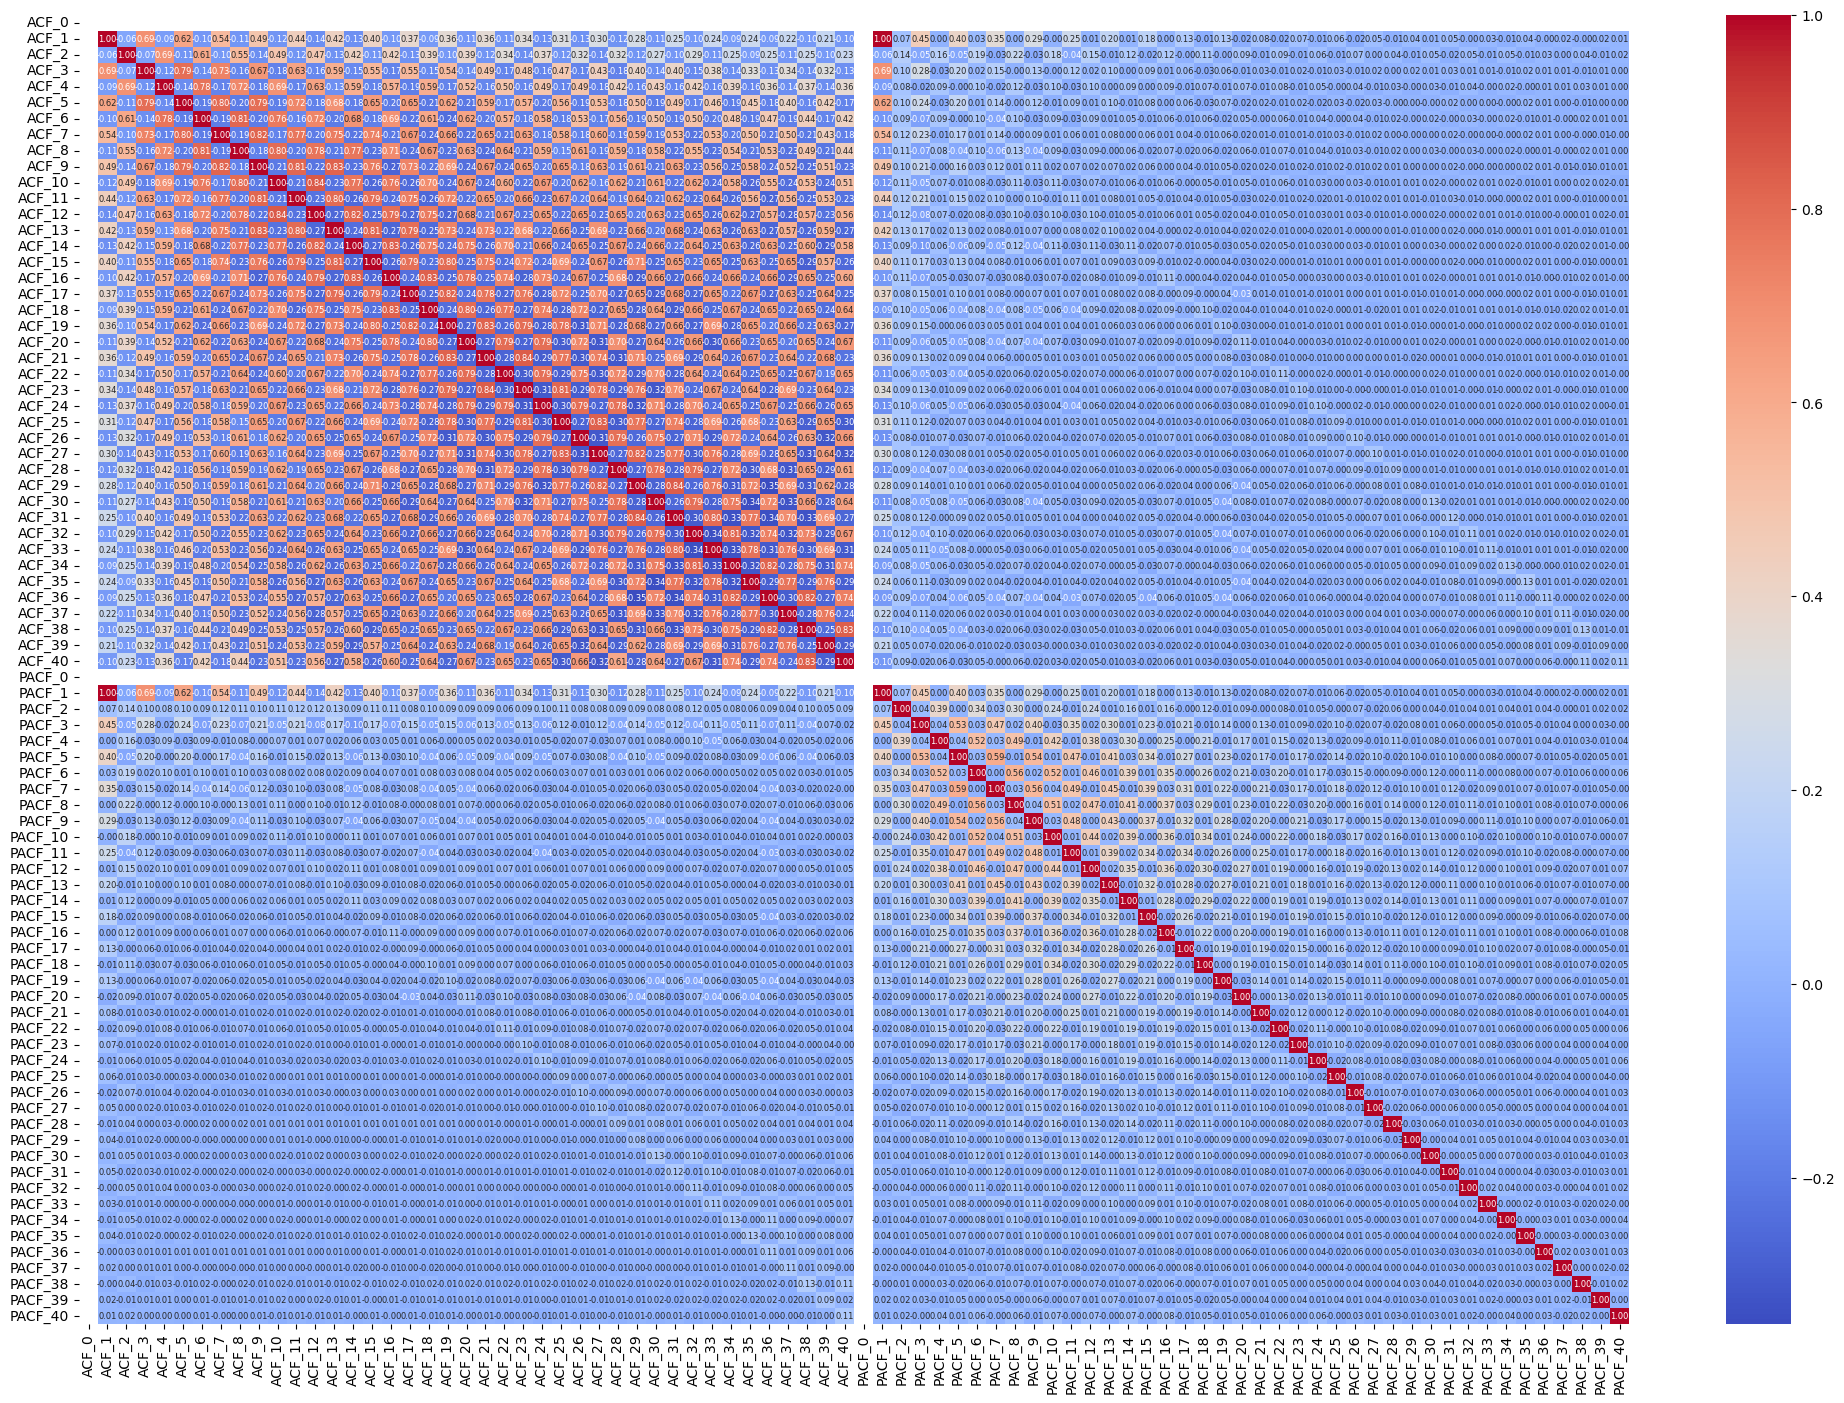

In [8]:
corr_matrix = df_subset.corr()
plt.figure(figsize=(25, 17))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 6})
plt.show()

**Some observations from the Correlation Matrix:**

> **Note on ACF_0 and PACF_0:**
>
> The features `ACF_0` and `PACF_0` appear blank in the correlation matrix because they have a constant value of 1 across all observations in the dataset. Since Pearson correlation relies on variability, these columns have a standard deviation of zero, making their correlation with any other variable mathematically undefined. As a result, the `.corr()` method returns `NaN` for all correlations involving these variables, and `seaborn.heatmap` leaves those cells empty (white).
>
> Constant columns like these do not provide useful information for statistical analysis.



In [9]:
df_subset = df_subset.drop(columns=['ACF_0', 'PACF_0'])

---

## Preprocessing

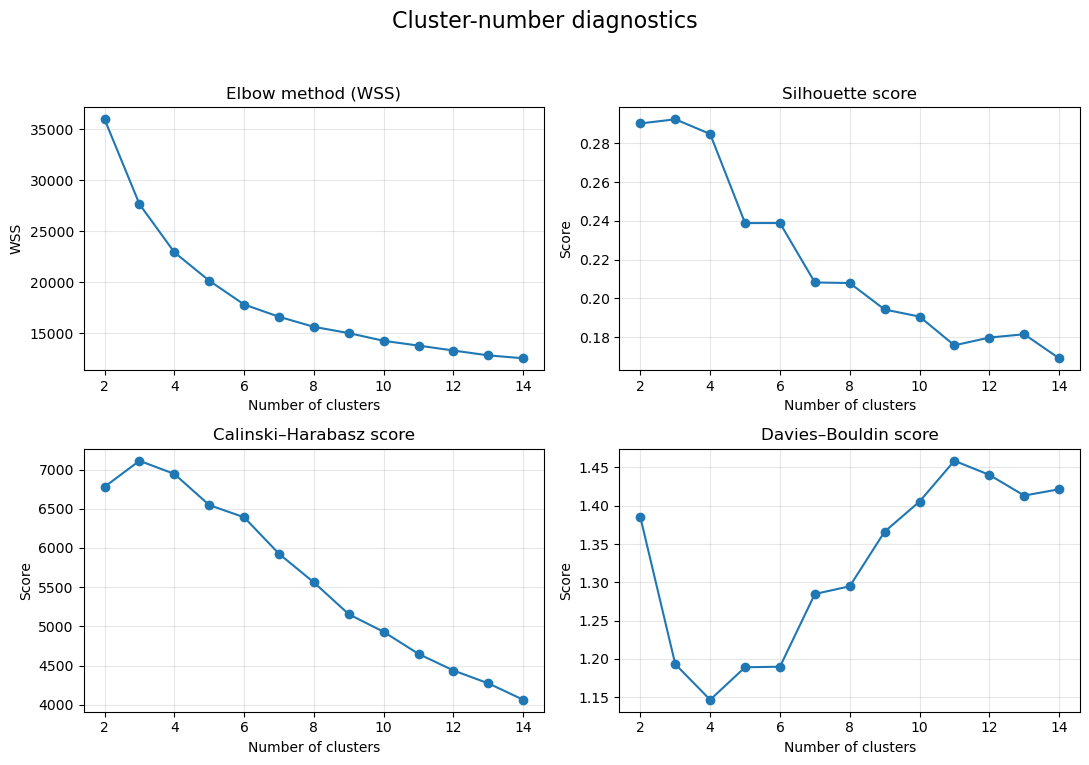

In [10]:
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics

warnings.filterwarnings("ignore",
                        message=".*KMeans is known to have a memory leak.*")

wss = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_subset)         
    wss.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_subset)               
    silhouette_scores.append(metrics.silhouette_score(df_subset, kmeans.labels_))

ch_scores, db_scores = [], []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_subset)
    ch_scores.append(metrics.calinski_harabasz_score(df_subset, kmeans.labels_))
    db_scores.append(metrics.davies_bouldin_score(df_subset, kmeans.labels_))



fig, axes = plt.subplots(2, 2, figsize=(11, 8))
fig.suptitle('Cluster-number diagnostics', fontsize=16)

axes[0, 0].plot(range(2, 15), wss, marker='o')
axes[0, 0].set_title('Elbow method (WSS)')
axes[0, 0].set_xlabel('Number of clusters')
axes[0, 0].set_ylabel('WSS')

axes[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axes[0, 1].set_title('Silhouette score')
axes[0, 1].set_xlabel('Number of clusters')
axes[0, 1].set_ylabel('Score')

axes[1, 0].plot(range(2, 15), ch_scores, marker='o')
axes[1, 0].set_title('Calinski–Harabasz score')
axes[1, 0].set_xlabel('Number of clusters')
axes[1, 0].set_ylabel('Score')

axes[1, 1].plot(range(2, 15), db_scores, marker='o')
axes[1, 1].set_title('Davies–Bouldin score')
axes[1, 1].set_xlabel('Number of clusters')
axes[1, 1].set_ylabel('Score')

for ax in axes.flat:
    ax.grid(alpha=0.3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()
  

### Conclusions from metrics used:

> All 4 metrics used gave clear and similar results, 3-4 clusters.
>
> Then, we will use K-means and $k = 4$.  


---

Next, we'll try and assess each cluster's constituition.

In [11]:
kmeans_visualization = KMeans(n_clusters=4, random_state=42)
kmeans_visualization.fit(df_subset)
cluster_labels = kmeans_visualization.labels_

acf_data = df_subset.iloc[:, 0:40]  
pcf_data = df_subset.iloc[:, 40:] 


cluster_labels_acf = cluster_labels  
cluster_labels_pcf = cluster_labels  

centroids = kmeans_visualization.cluster_centers_

acf_centroids = centroids[:, :40]  
pcf_centroids = centroids[:, 40:]  


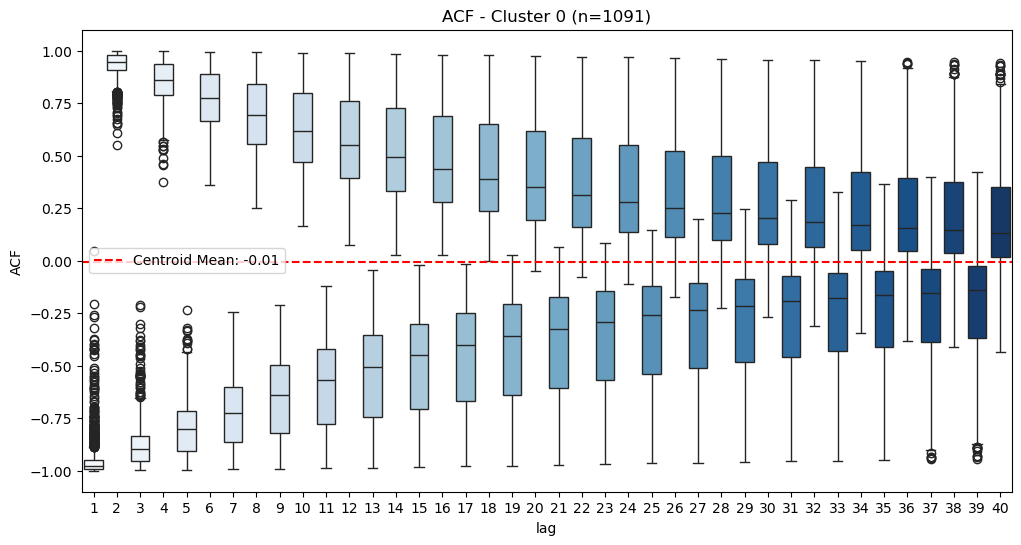

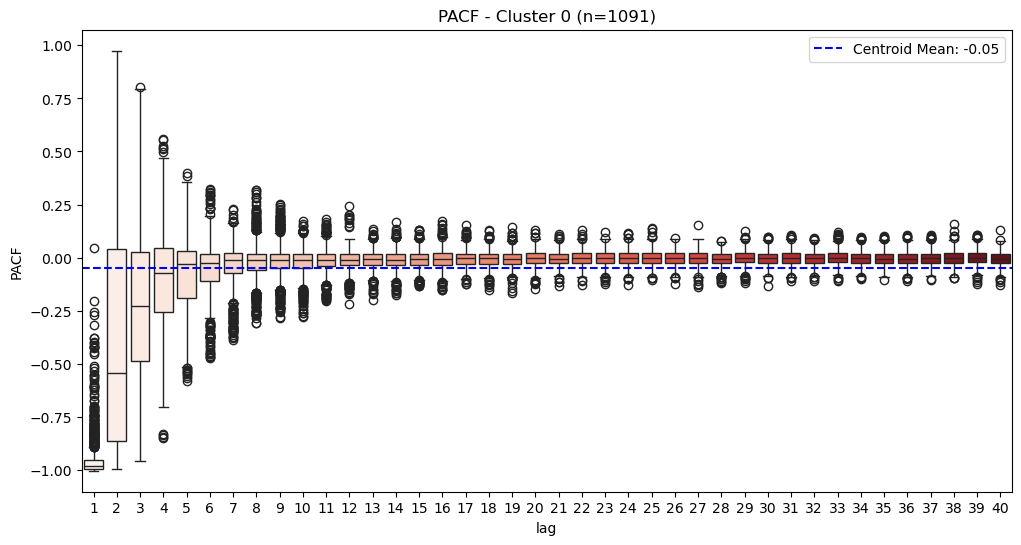

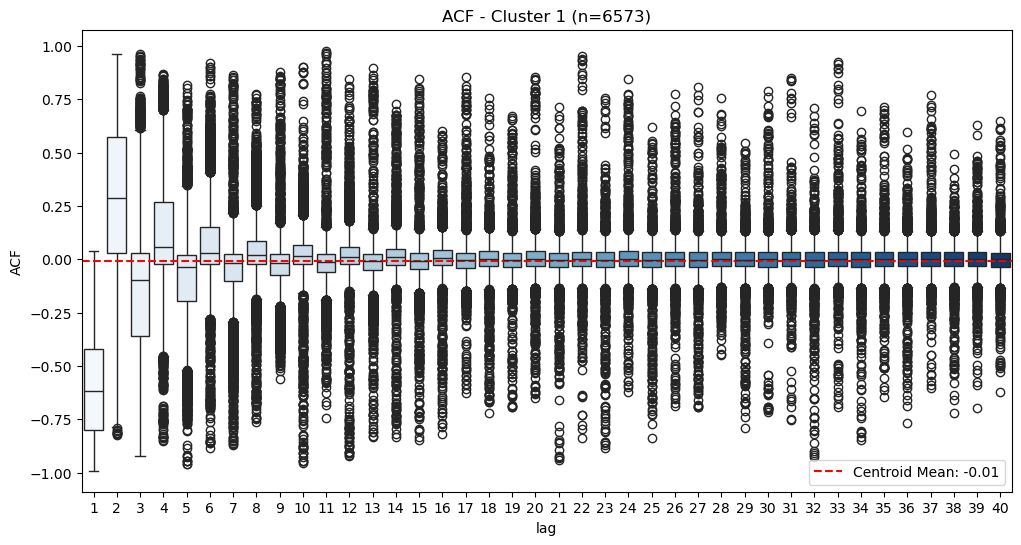

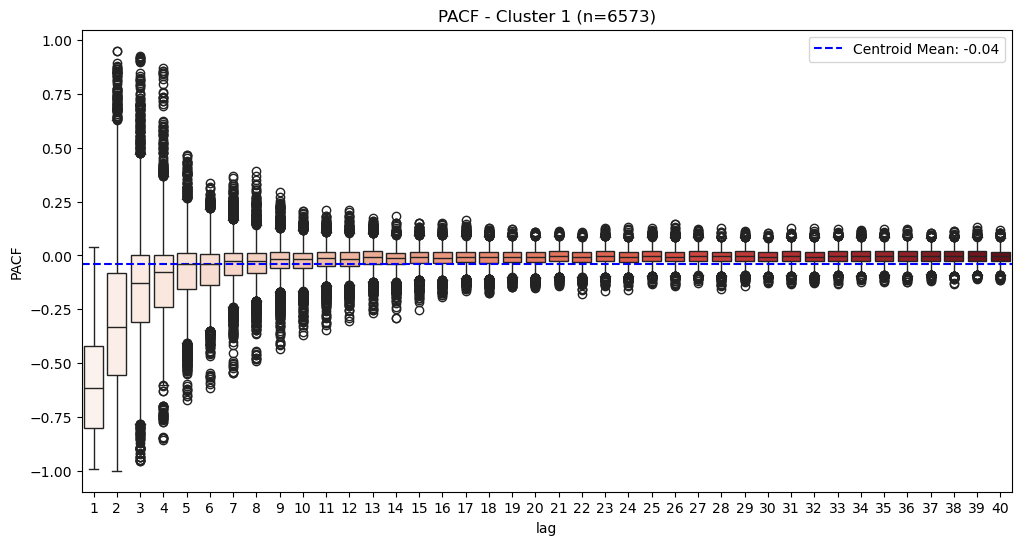

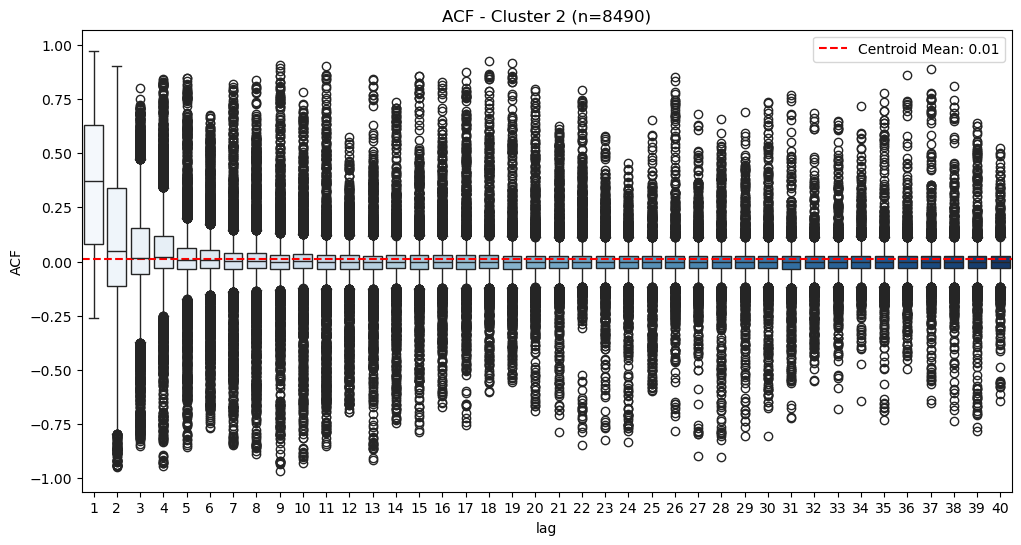

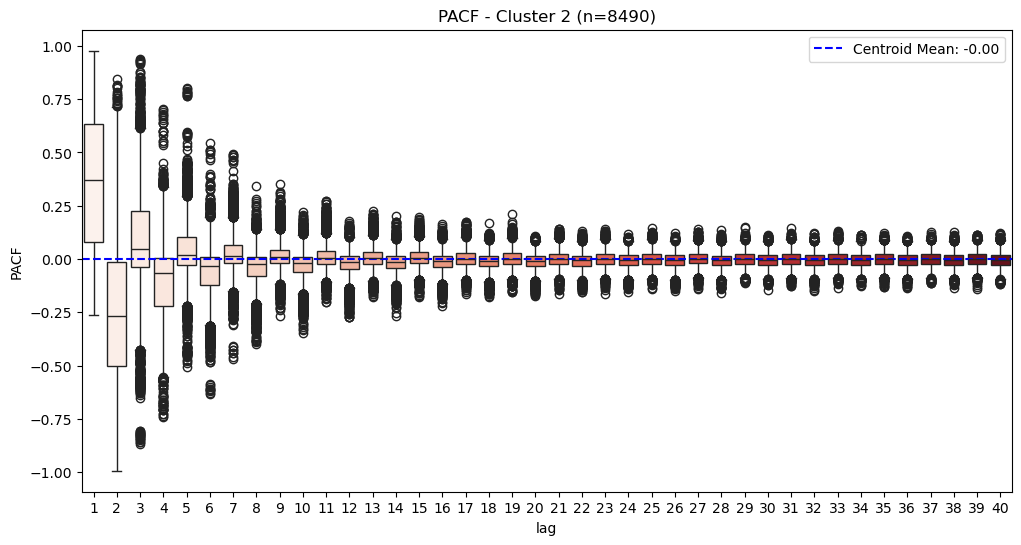

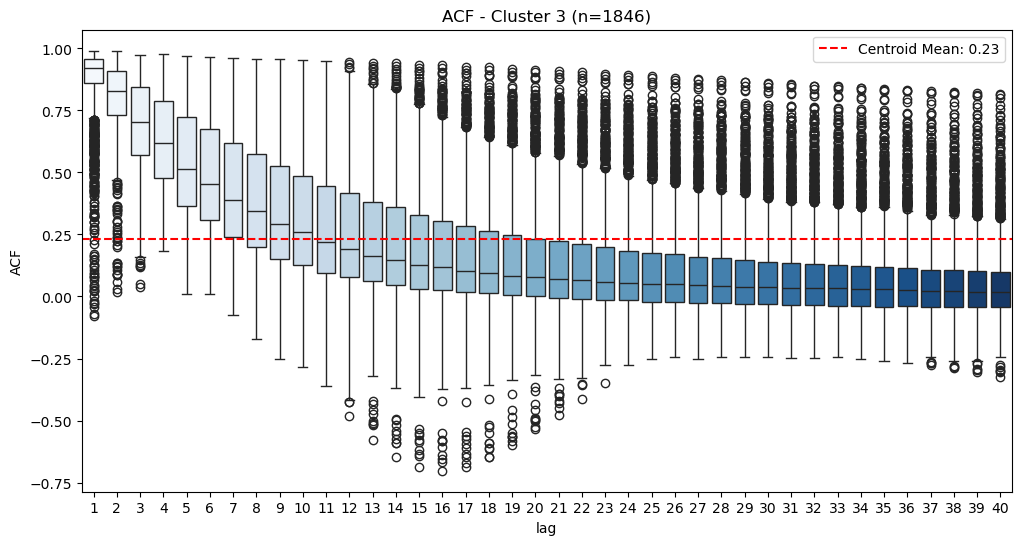

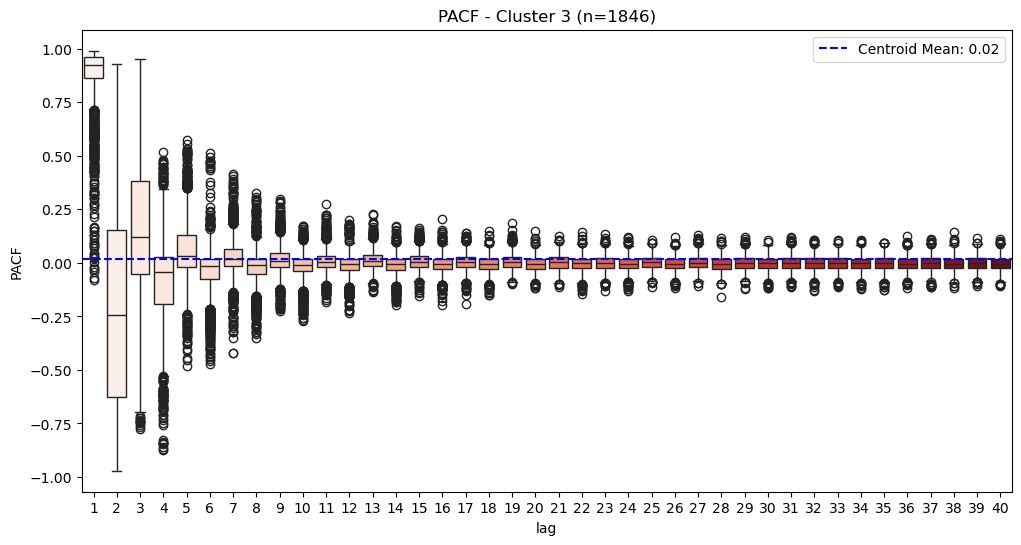

In [12]:
for cluster in range(4):
    # ACF Plot
    plt.figure(figsize=(12, 6))
    acf_cluster_data = acf_data[cluster_labels_acf == cluster]
    ax = sns.boxplot(data=acf_cluster_data, palette="Blues")
    
    plt.axhline(y=acf_centroids[cluster].mean(), color='r', linestyle='--', 
                label=f'Centroid Mean: {acf_centroids[cluster].mean():.2f}')
    
    plt.title(f"ACF - Cluster {cluster} (n={len(acf_cluster_data)})")
    plt.xlabel('lag')
    plt.ylabel('ACF')
    plt.xticks(ticks=range(40), labels=range(1, 41)) 
    plt.legend()
    
    # PCF Plot
    plt.figure(figsize=(12, 6))
    pcf_cluster_data = pcf_data[cluster_labels_pcf == cluster]
    sns.boxplot(data=pcf_cluster_data, palette="Reds")
    
    plt.axhline(y=pcf_centroids[cluster].mean(), color='b', linestyle='--',
               label=f'Centroid Mean: {pcf_centroids[cluster].mean():.2f}')
    
    plt.title(f"PACF - Cluster {cluster} (n={len(pcf_cluster_data)})")
    plt.xlabel('lag')
    plt.ylabel('PACF')
    plt.xticks(ticks=range(40), labels=range(1, 41)) 
    plt.legend()

### **Fit exponential distribution**

**Objective:**  
Our main objective in this step is to reduce the high dimensionality of the ACF and PACF features by summarizing their temporal decay behavior using exponential models. Specifically, we aim to fit an exponential function of the form:

$$y(h) = a \cdot e^{-b h}$$

where $h$ is the lag and $b$ is the decay parameter. Since the autocorrelation at lag 0 is always 1, we assume $a \approx 1$, reducing the model to:

 $$y(h) = e^{-b h}$$

This model is fitted to the absolute values of the ACF and PACF (excluding lag 0) to estimate how quickly the autocorrelation decays with lag. The decay rate $b$ is extracted as a compact feature that captures the temporal memory of the time series.

Additionally, we extract a **sign pattern** feature to describe the overall shape of the ACF/PACF:
- `+1`: if the sequence is positive
- `-1`: if the sequence is negative
- `0`: if the sequence is alterned 

These two features (*decay* and *sign*) are computed separately for ACF and PACF, resulting in a total of **4 new features per instance** that should preserve essential information while significantly reducing dimensionality.


In [13]:
from scipy.optimize import curve_fit

def classify_sign(first_k, eps=1e-6):
    """
    first_k : array of k first lags (excluding lag 0)
    returns : {+1, -1, 0}
    """
    s = np.sign(first_k)
    s[np.abs(first_k) < eps] = 0     

    if np.all(s >= 0):
        return 1
    if np.all(s <= 0):
        return -1
    else:
        return 0

def fit_acf_pacf(row, prefix, k_first=3):
    vals = np.array([row[f'{prefix}_{i}'] for i in range(1, 41)])
    first_k = vals[:k_first]
    sign_feature = classify_sign(first_k)

    y = np.abs(vals)
    x = np.arange(1, 41)
    y = np.where(y < 1e-6, 1e-6, y)
    try:
        b, _ = curve_fit(lambda h, b: -b*h, x, np.log(y))
        decay = b[0]
    except Exception:
        decay = np.nan
    return decay, sign_feature


acf_decay_list = []
acf_sign_list = []
pacf_decay_list = []
pacf_sign_list = []

for _, row in df_subset.iterrows():
    acf_decay, acf_sign = fit_acf_pacf(row, 'ACF')
    pacf_decay, pacf_sign = fit_acf_pacf(row, 'PACF')
    acf_decay_list.append(acf_decay)
    acf_sign_list.append(acf_sign)
    pacf_decay_list.append(pacf_decay)
    pacf_sign_list.append(pacf_sign)

df_subset['ACF_decay'] = acf_decay_list
df_subset['ACF_sign'] = acf_sign_list
df_subset['PACF_decay'] = pacf_decay_list
df_subset['PACF_sign'] = pacf_sign_list

df_features = df_subset[['ACF_decay', 'ACF_sign', 'PACF_decay', 'PACF_sign']]
df_features

,ACF_decay,ACF_sign,PACF_decay,PACF_sign
0,0.158485,0,0.151554,0
1,0.163079,0,0.153349,0
2,0.149073,0,0.153035,0
3,0.146460,0,0.145474,0
4,0.144902,1,0.148281,0
...,...,...,...,...
17995,0.109449,1,0.133009,0
17996,0.153496,1,0.143917,0
17997,0.137162,1,0.140038,0
17998,0.130947,1,0.132484,0


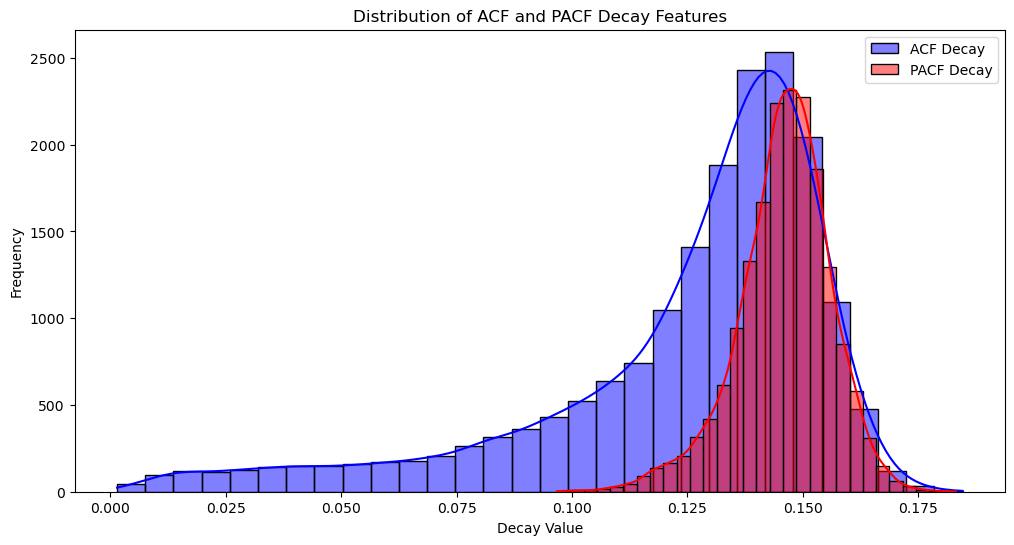

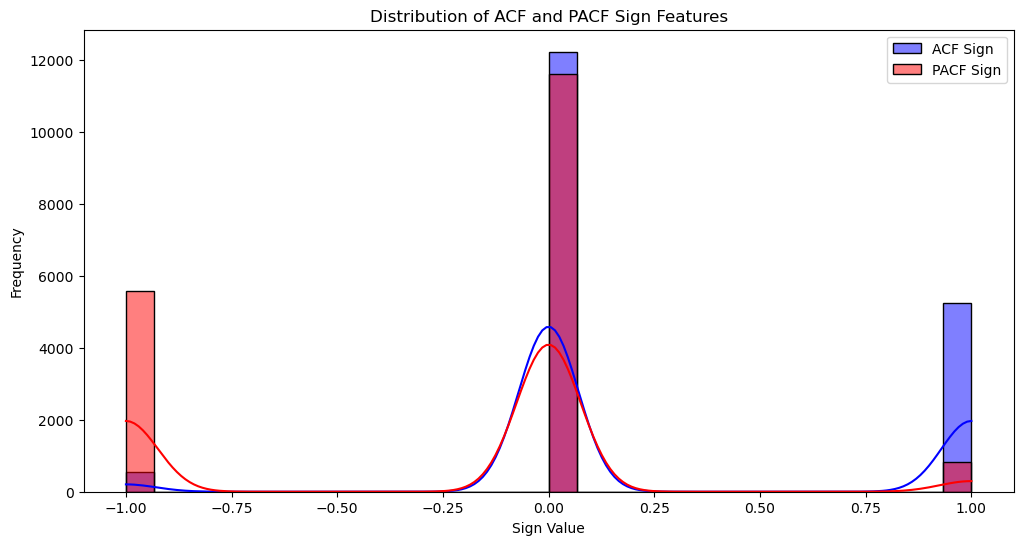

In [14]:
plt.figure(figsize=(12, 6)) 
sns.histplot(df_subset['ACF_decay'], bins=30, kde=True, color='blue', label='ACF Decay')
sns.histplot(df_subset['PACF_decay'], bins=30, kde=True, color='red', label='PACF Decay')
plt.title('Distribution of ACF and PACF Decay Features')
plt.xlabel('Decay Value')
plt.ylabel('Frequency')
plt.legend()
plt.figure(figsize=(12, 6))
sns.histplot(df_subset['ACF_sign'], bins=30, kde=True, color='blue', label='ACF Sign')
sns.histplot(df_subset['PACF_sign'], bins=30, kde=True, color='red', label='PACF Sign')
plt.title('Distribution of ACF and PACF Sign Features')
plt.xlabel('Sign Value')
plt.ylabel('Frequency')
plt.legend()

### Feature Scaling

We now have 2 features where the values range from 0 to 0.175 and 2 other categorical features that take values -1, 0 and 1. In this case, feature scaling is required.  

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = ['ACF_decay', 'PACF_decay']
cat_cols = ['ACF_sign', 'PACF_sign']

normaliser = ColumnTransformer(
    [('num', StandardScaler(), num_cols),
     ('cat', OneHotEncoder(categories=[[-1, 0, 1], [-1, 0, 1]], handle_unknown='ignore'), cat_cols)])
X_scaled = normaliser.fit_transform(df_features)

import pandas as pd
feature_names = (normaliser.named_transformers_['num'].get_feature_names_out(num_cols).tolist() + normaliser.named_transformers_['cat'].get_feature_names_out(cat_cols).tolist())

df_scaled = pd.DataFrame(X_scaled.toarray() if hasattr(X_scaled, 'toarray') else X_scaled, columns=feature_names, index=df_features.index)

---

## Methodology

### K-means


When choosing the best number of clusters or evaluating clustering quality, several internal metrics are commonly used:

**Elbow Method (Inertia)**
- Definition: Measures the within-cluster sum of squared distances (inertia).
- Goal: Minimize inertia, tighter, means more compact clusters.
- Elbow heuristic: Plot inertia vs. k. The "elbow" point where improvement drops off, suggesting an optimal k.
- Limitations: Subjective and only applies to centroid-based methods like K-Means.

**Silhouette Score**
- Definition: Measures how similar a point is to its own cluster vs. others.
- Range: -1 (bad clustering) to 1 (perfect clustering), with 0 meaning overlapping clusters.
- **Higher is better**: Indicates well-separated, dense clusters.

**Calinski-Harabasz Index**
- Definition: Ratio of between-cluster dispersion** to **within-cluster dispersion.
- Higher is better: Suggests compact clusters that are far apart.   

**Davies-Bouldin Score**
- Definition: Average similarity between each cluster and its most similar other cluster.
- Lower is better: Indicates better clustering (low intra-cluster spread and high inter-cluster separation).


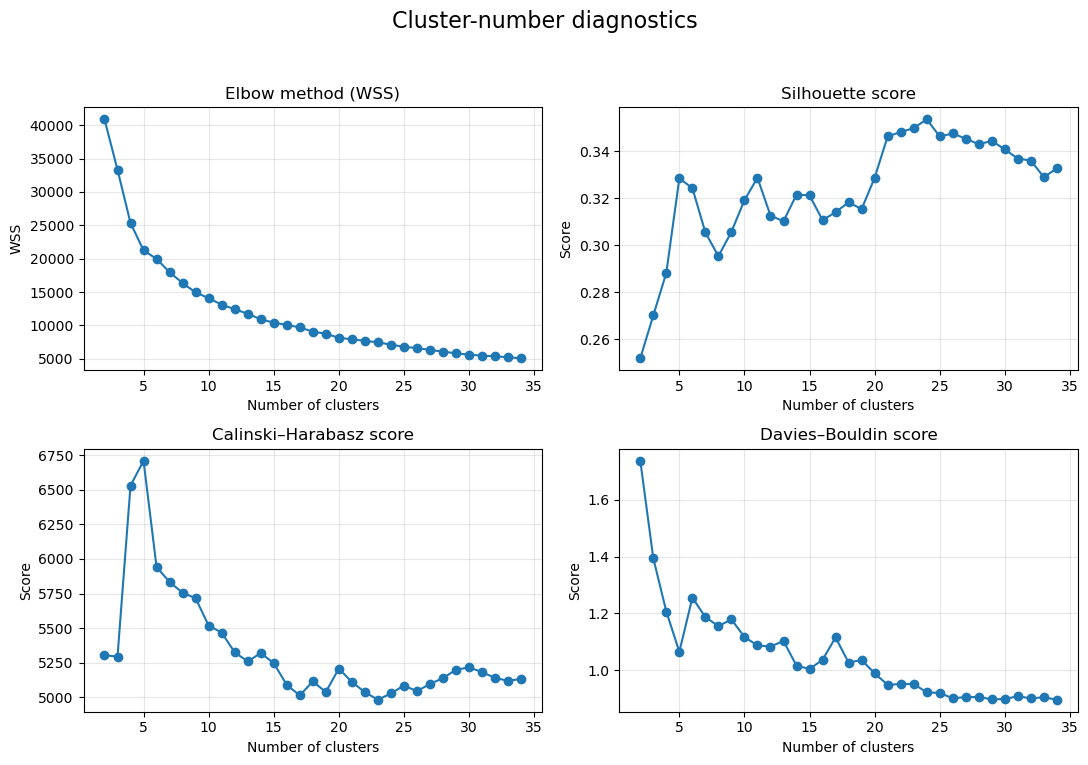

In [16]:
warnings.filterwarnings("ignore",
                        message=".*KMeans is known to have a memory leak.*")

wss = []
for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)         
    wss.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)               
    silhouette_scores.append(metrics.silhouette_score(df_scaled, kmeans.labels_))

ch_scores, db_scores = [], []
for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    ch_scores.append(metrics.calinski_harabasz_score(df_scaled, kmeans.labels_))
    db_scores.append(metrics.davies_bouldin_score(df_scaled, kmeans.labels_))


fig, axes = plt.subplots(2, 2, figsize=(11, 8))
fig.suptitle('Cluster-number diagnostics', fontsize=16)

axes[0, 0].plot(range(2, 35), wss, marker='o')
axes[0, 0].set_title('Elbow method (WSS)')
axes[0, 0].set_xlabel('Number of clusters')
axes[0, 0].set_ylabel('WSS')

axes[0, 1].plot(range(2, 35), silhouette_scores, marker='o')
axes[0, 1].set_title('Silhouette score')
axes[0, 1].set_xlabel('Number of clusters')
axes[0, 1].set_ylabel('Score')

axes[1, 0].plot(range(2, 35), ch_scores, marker='o')
axes[1, 0].set_title('Calinski–Harabasz score')
axes[1, 0].set_xlabel('Number of clusters')
axes[1, 0].set_ylabel('Score')

axes[1, 1].plot(range(2, 35), db_scores, marker='o')
axes[1, 1].set_title('Davies–Bouldin score')
axes[1, 1].set_xlabel('Number of clusters')
axes[1, 1].set_ylabel('Score')

for ax in axes.flat:
    ax.grid(alpha=0.3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

>Notes: this time it is not as clear to determine a number of clusters as before (where all the metrics were pointing to the same k), but we can still conclude that for various metrics there is a clear distinction between $k=5$ and the rest.
> 
> This way we'll use k-means with $k=5$.

#### K-means algorithm 

In [17]:
from sklearn.metrics import (silhouette_score, calinski_harabasz_score,
                             davies_bouldin_score, adjusted_rand_score)

true_labels = (df['p'] * 6 + df['q']).to_numpy()  

def kmeans_metrics(X, y_true, k, seeds=(0, 1, 2)):
    s_list, ch_list, db_list, ari_list = [], [], [], []
    for rs in seeds:
        km  = KMeans(n_clusters=k, n_init=20, init='k-means++',
                     random_state=rs).fit(X)
        lbl = km.labels_
        s_list .append(silhouette_score(X, lbl))
        ch_list.append(calinski_harabasz_score(X, lbl))
        db_list.append(davies_bouldin_score(X, lbl))
        ari_list.append(adjusted_rand_score(y_true, lbl))

    # helper
    mean_std = lambda a: (np.mean(a), np.std(a))

    (s_m,  s_s)   = mean_std(s_list)
    (ch_m, ch_s)  = mean_std(ch_list)
    (db_m, db_s)  = mean_std(db_list)
    ari_m         = np.mean(ari_list)        

    return dict(k=k,
                sil_mean=s_m,  sil_std=s_s,
                CH_mean=ch_m,   CH_std=ch_s,
                DB_mean=db_m,   DB_std=db_s,
                ari_mean=ari_m)              


k_list = [3, 4, 5, 8, 15, 25, 36, 100]
rows   = [kmeans_metrics(df_scaled.values, true_labels, k) for k in k_list]

metrics_df = pd.DataFrame(rows).round(3)
print(metrics_df)


     k  sil_mean  sil_std   CH_mean  CH_std  DB_mean  DB_std  ari_mean
0    3     0.258    0.000  6552.178   0.005    1.332   0.000     0.006
1    4     0.288    0.000  6530.515   0.003    1.206   0.000     0.008
2    5     0.329    0.000  6709.783   0.003    1.065   0.000     0.010
3    8     0.306    0.000  5942.575   0.033    1.068   0.000     0.010
4   15     0.339    0.000  5338.047   1.527    1.006   0.005     0.012
5   25     0.338    0.003  5210.544  15.578    0.924   0.006     0.013
6   36     0.332    0.002  5120.278  10.725    0.891   0.010     0.013
7  100     0.324    0.002  4958.344  10.987    0.832   0.004     0.009


> **Observations:**
>
> The ARI score is very low for all number of clusters. Even though it reaches a maximum at 36-37 clusters the diference is minimum, the order is still $0.01$.
> However, the results were expected, given the fact that ARI uses the true labels, and if the number of clusters is 36 it will naturally get more correct answers. 
> 
> Next we'll visualize what each cluster's true labels it contains in order to find some sort of pattern in this clsutering algorithm.

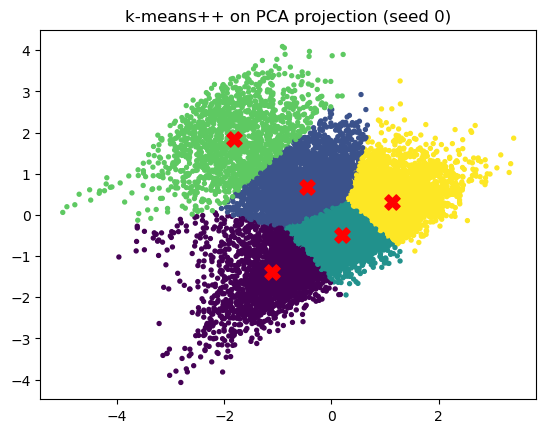

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(df_scaled)
X_pca = pca.transform(df_scaled)

seeds = [0,1,2]
all_lbl = []

for rs in seeds:
    km = KMeans(n_clusters=5, init='k-means++', n_init=20,
                random_state=rs).fit(X_pca)
    all_lbl.append(km.labels_)

lbl0   = all_lbl[0]
centers = KMeans(n_clusters=5, init='k-means++',
                 n_init=20, random_state=0).fit(X_pca).cluster_centers_

plt.scatter(X_pca[:,0], X_pca[:,1], c=lbl0, cmap='viridis', s=8)
plt.scatter(centers[:,0], centers[:,1], c='red', s=120, marker='X')
plt.title("k-means++ on PCA projection (seed 0)")
plt.show()


cluster
1    5067
2    4031
3    3831
0    2818
4    2253
Name: count, dtype: int64


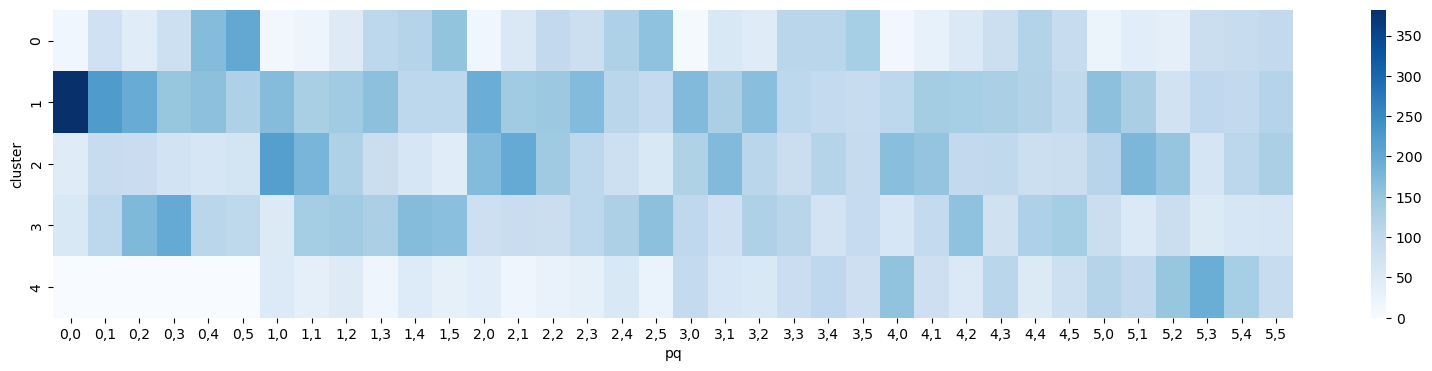

,ACF_decay,PACF_decay,ACF_sign_mean,PACF_sign_mean
0,0.190,-1.600,0.150,-0.370
1,0.490,0.420,-0.000,0.000
2,0.130,0.300,1.000,0.150
3,0.340,0.270,-0.120,-1.000
4,-2.150,0.070,0.310,-0.210


In [19]:
k_star = 5       
km = KMeans(k_star, n_init=20, random_state=42).fit(df_scaled)
df_temp          = df[['p','q']].copy()
df_temp['cluster'] = km.labels_

print(df_temp['cluster'].value_counts())

ct = (df_temp.assign(pq=df_temp['p'].astype(str)+','+df_temp['q'].astype(str)).pivot_table(index='cluster', columns='pq', aggfunc='size', fill_value=0))

plt.figure(figsize=(20,4)); sns.heatmap(ct, cmap='Blues')
plt.show()

centroids = pd.DataFrame(
    km.cluster_centers_,
    columns=df_scaled.columns
)
centroids["ACF_sign_mean"] = (-1 * centroids["ACF_sign_-1"] + 0 * centroids["ACF_sign_0"] + 1 * centroids["ACF_sign_1"])

centroids["PACF_sign_mean"] = (-1 * centroids["PACF_sign_-1"] + 0 * centroids["PACF_sign_0"] + 1 * centroids["PACF_sign_1"])

centroids_summary = centroids[["ACF_decay", "PACF_decay", "ACF_sign_mean", "PACF_sign_mean"]]
centroids_summary.round(2).style.format({
    "ACF_decay": "{:.3f}",
    "PACF_decay": "{:.3f}",
    "ACF_sign_mean": "{:.3f}",
    "PACF_sign_mean": "{:.3f}"
}).background_gradient(cmap='coolwarm', axis=0)


> **Conclusions:**
>
>
>

### DBSCAN

Now we'll use a density-based algorithm: DBSCAN.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
 - connects areas of high density into clusters, 
 - allows for arbitrary-shaped distributions (non-parametric),
 - do not assign outliers to clusters.

DBSCAN uses two parameters
 - minPts: minimum number of points clustered together for a region to be considered dense.
 - ε: a distance threshold used to locate points in the neighborhood of any point

The following code was re-used from class number 8 from the file *unsupervised.py*.

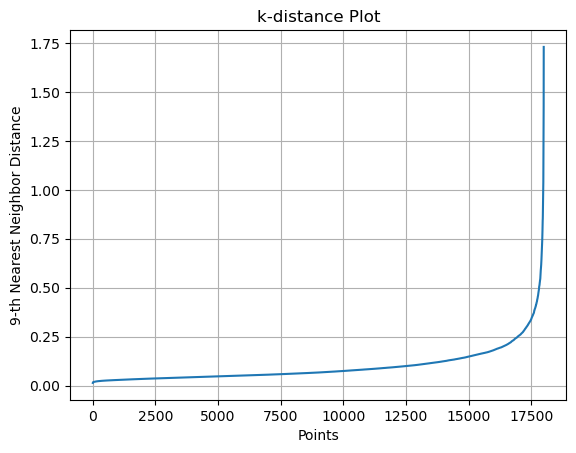

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

n = 9  # Since we have 8 features, we can set min_samples = 9, 8 because we did one hot encoding, otherwise it would be 4
nbrs = NearestNeighbors(n_neighbors=n)
nbrs.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

distances = np.sort(distances[:, n-1], axis=0)

plt.plot(distances)
plt.title('k-distance Plot')
plt.xlabel('Points')
plt.ylabel(f'{n}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [21]:
eps_grid = np.linspace(0.26, 0.50, 9)    
records  = []
for eps in eps_grid:
    db = DBSCAN(eps=eps, min_samples=9).fit(df_scaled)
    lbl = db.labels_
    core_mask = lbl != -1
    ncl   = len(set(lbl)) - (-1 in lbl)
    noise = (lbl == -1).mean()*100
    sil   = silhouette_score(df_scaled[core_mask], lbl[core_mask]) if ncl>1 else np.nan
    records.append([eps, ncl, noise, sil])
pd.DataFrame(records, columns=['eps','clusters','noise%','sil'])


,eps,clusters,noise%,sil
0,0.26,9,2.911111,0.239700
1,0.29,7,2.116667,0.246101
2,0.32,8,1.572222,0.208551
3,0.35,7,1.094444,0.235385
4,0.38,7,0.877778,0.234138
5,0.41,6,0.727778,0.265793
6,0.44,5,0.605556,0.273996
7,0.47,6,0.433333,0.265218
8,0.50,6,0.366667,0.264815


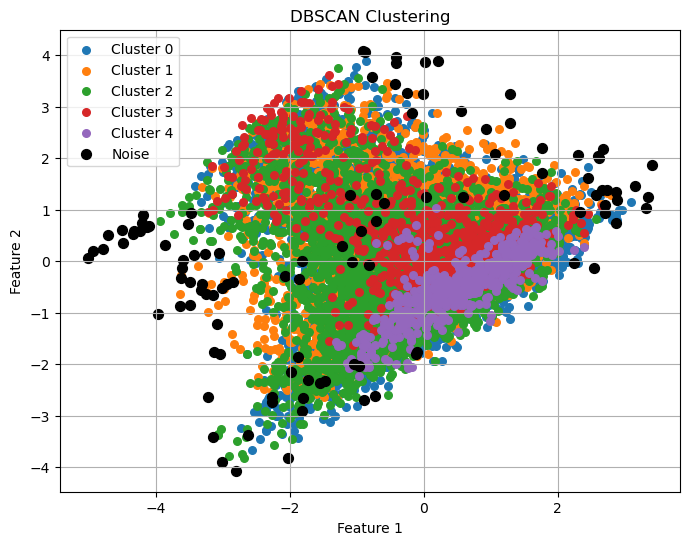

In [22]:
dbscan = DBSCAN(eps=0.44, min_samples=9)  

labels_dbscan = dbscan.fit_predict(df_scaled) 

plt.figure(figsize=(8, 6))

for cluster in set(labels_dbscan):
    mask = labels_dbscan == cluster
    if cluster == -1:
        plt.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], color='black', label='Noise', s=50, edgecolors='k')
    else:
        plt.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], label=f'Cluster {cluster}', s=30)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

labels = dbscan.labels_
mask   = labels != -1                    

ari = adjusted_rand_score(true_labels, labels)
print(f"ARI (with noise) = {ari:.3f}")

if mask.sum() > 0 and len(set(labels[mask])) > 1:
    sil = silhouette_score(df_scaled[mask], labels[mask])
    print(f"Silhouette (noise excluded) = {sil:.3f}")
else:
    print("Silhouette not defined (all points noise or only one cluster).")


ARI (with noise) = 0.005
Silhouette (noise excluded) = 0.274


cluster
 0    7156
 2    5004
 1    4394
 3     819
 4     518
-1     109
Name: count, dtype: int64


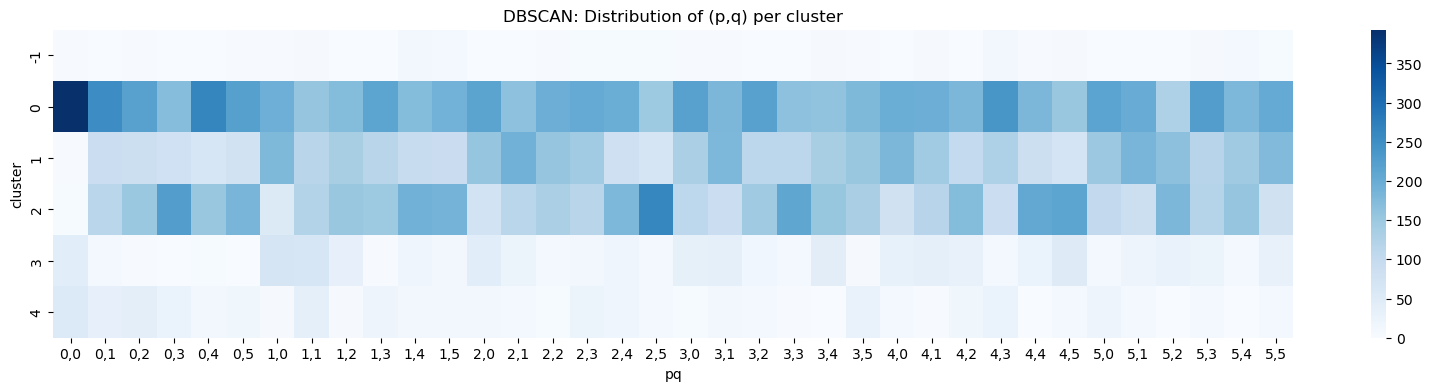

,ACF_decay,PACF_decay,ACF_sign_mean,PACF_sign_mean
cluster,,,,
0,0.150,0.060,0.000,0.000
1,-0.180,0.030,1.000,0.000
2,-0.050,-0.150,0.000,-1.000
3,-0.320,0.280,1.000,1.000
4,0.700,0.040,-1.000,-1.000


In [24]:
df_dbscan = df.copy()
df_dbscan['cluster'] = labels_dbscan

print(df_dbscan['cluster'].value_counts()) 

ct = (df_dbscan
      .assign(pq=df_dbscan['p'].astype(str)+','+df_dbscan['q'].astype(str))
      .pivot_table(index='cluster', columns='pq', aggfunc='size', fill_value=0))

plt.figure(figsize=(20,4))
sns.heatmap(ct, cmap='Blues')
plt.title("DBSCAN: Distribution of (p,q) per cluster")
plt.show()



df_scaled_copy = df_scaled.copy()
df_scaled_copy['cluster'] = labels_dbscan

centroids = df_scaled_copy[df_scaled_copy['cluster'] != -1].groupby('cluster').mean()


centroids["ACF_sign_mean"] = (
    -1 * centroids["ACF_sign_-1"] +
     0 * centroids["ACF_sign_0"] +
     1 * centroids["ACF_sign_1"]
)

centroids["PACF_sign_mean"] = (
    -1 * centroids["PACF_sign_-1"] +
     0 * centroids["PACF_sign_0"] +
     1 * centroids["PACF_sign_1"]
)

summary = centroids[["ACF_decay", "PACF_decay", "ACF_sign_mean", "PACF_sign_mean"]]
summary.round(2).style.format({
    "ACF_decay": "{:.3f}",
    "PACF_decay": "{:.3f}",
    "ACF_sign_mean": "{:.3f}",
    "PACF_sign_mean": "{:.3f}"
}).background_gradient(cmap='coolwarm', axis=0)




> **Observations:**
>
> Taking into account the Silhouette metric and ARI score (even though in this case ARI score is not the best indicative), comparing K-means and DBSCAN, the first performed better.
> We can clearly see 

### K-means Vs. DBSCAN

Hungarian-aligned accuracy  : 0.678


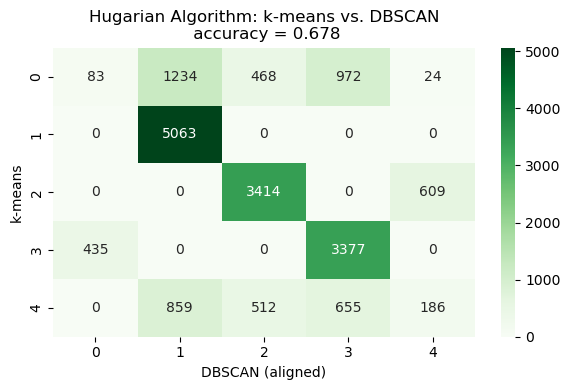

Per-cluster Jaccard: [0.026 0.707 0.681 0.619 0.064]
Mean Jaccard overlap: 0.419


In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment

k_star        = 5                    
labels_km_all = km.labels_            
labels_db_all = labels_dbscan         

mask          = labels_db_all != -1
labels_km     = labels_km_all[mask]
labels_db     = labels_db_all[mask]

cm = confusion_matrix(labels_km, labels_db, labels=np.arange(k_star))

row_ind, col_ind = linear_sum_assignment(-cm)        
label_map = {col: row for row, col in zip(row_ind, col_ind)}

for c in np.setdiff1d(np.arange(k_star), list(label_map.keys())):
    label_map[c] = c

aligned_labels_db = np.array([
    label_map.get(lbl, -1) if lbl != -1 else -1
    for lbl in labels_db_all
])

acc  = accuracy_score(labels_km_all[mask], aligned_labels_db[mask])
print(f"Hungarian-aligned accuracy  : {acc:.3f}")

cm_aligned = confusion_matrix(labels_km_all[mask],
                              aligned_labels_db[mask],
                              labels=np.arange(k_star))

plt.figure(figsize=(6,4))
sns.heatmap(cm_aligned, annot=True, fmt='d', cmap='Greens')
plt.xlabel('DBSCAN (aligned)'); plt.ylabel('k-means')
plt.title('Hugarian Algorithm: k-means vs. DBSCAN\n accuracy = {:.3f}'.format(acc))
plt.tight_layout()
plt.show()

jac = [
    np.logical_and(labels_km_all==i, aligned_labels_db==i).sum() /
    np.logical_or (labels_km_all==i, aligned_labels_db==i).sum()
    for i in range(k_star)
]
print("Per-cluster Jaccard:", np.round(jac, 3))
print("Mean Jaccard overlap:", np.mean(jac).round(3))


In [26]:
import numpy as np, pandas as pd
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             calinski_harabasz_score, adjusted_rand_score,
                             normalized_mutual_info_score)

def purity_score(y_true, y_pred):
    """Return cluster purity (requires >=2 clusters)."""
    contingency = pd.crosstab(y_pred, y_true)
    return np.sum(np.max(contingency.values, axis=1)) / len(y_true)

def cluster_metrics(name, labels, X, y_true):
    """Return a dict of all metrics for given label vector."""
    mask_core = labels != -1                    
    k         = len(set(labels[mask_core]))    

    if k > 1:
        sil = silhouette_score(X[mask_core], labels[mask_core])
        dbi = davies_bouldin_score(X[mask_core], labels[mask_core])
        ch  = calinski_harabasz_score(X[mask_core], labels[mask_core])
    else:
        sil = dbi = ch = np.nan

    ari = adjusted_rand_score(y_true, labels)
    nmi = normalized_mutual_info_score(y_true, labels)
    pur = purity_score(y_true, labels)

    noise_pct = (labels == -1).mean() * 100

    return dict(Algo=name, k=k, noise_pct=noise_pct,
                Sil=sil, DBI=dbi, CH=ch, ARI=ari, NMI=nmi, Purity=pur)

X_mat = df_scaled.values       

rows = []
rows.append(cluster_metrics('k-means',
                            labels_km_all,     
                            X_mat,
                            true_labels))

rows.append(cluster_metrics('DBSCAN',
                            labels_dbscan,   
                            X_mat,
                            true_labels))


metrics_df = pd.DataFrame(rows).round(3)
print(metrics_df)
metrics_df.to_csv('metrics_table.csv', index=False)



      Algo  k  noise_pct    Sil    DBI        CH    ARI    NMI  Purity
0  k-means  5      0.000  0.329  1.065  6709.777  0.010  0.047   0.066
1   DBSCAN  5      0.606  0.274  1.591  2324.693  0.005  0.031   0.055


### Agglomerative Clustering

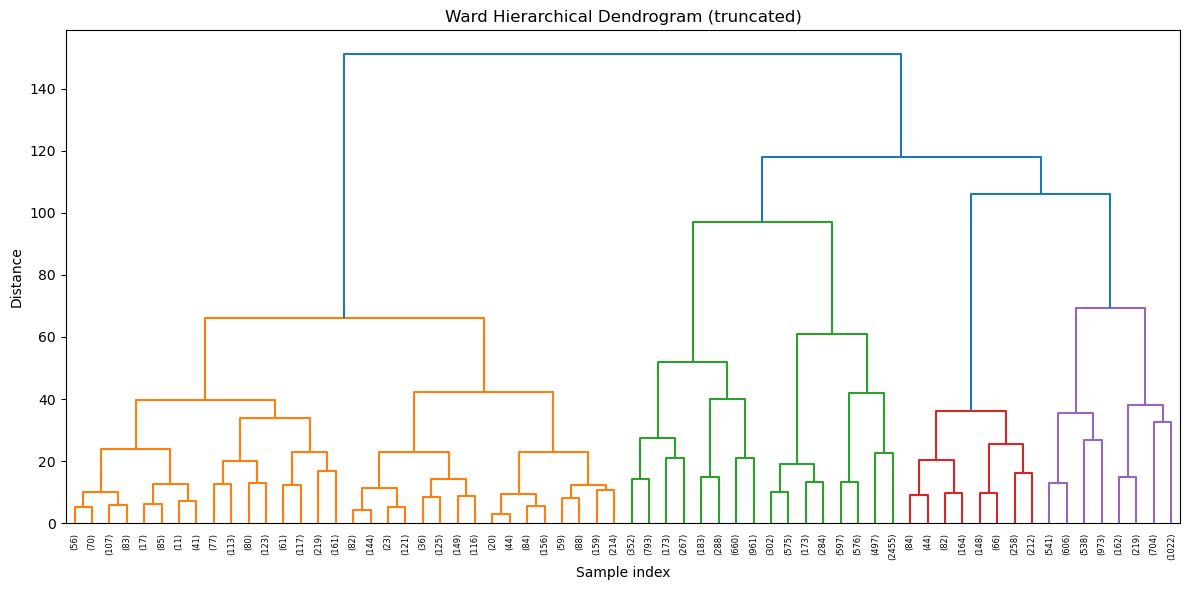

In [31]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             calinski_harabasz_score, adjusted_rand_score,
                             normalized_mutual_info_score, accuracy_score,
                             confusion_matrix)

Z = linkage(df_scaled, method='ward')  

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  
plt.title('Ward Hierarchical Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


cluster
2    5459
4    4765
1    3677
0    3041
3    1058
Name: count, dtype: int64


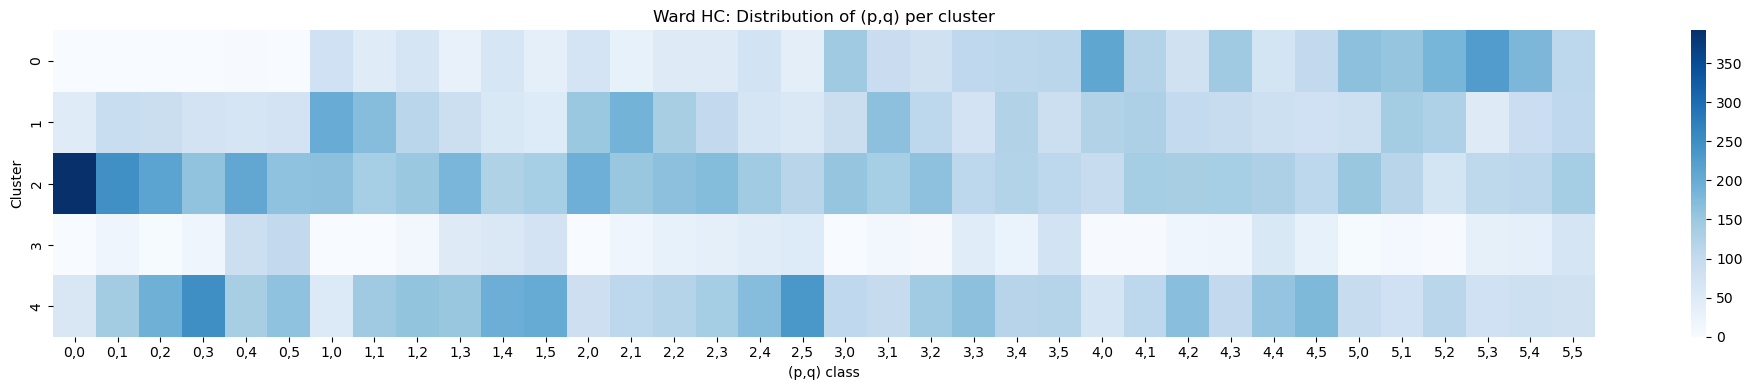

,ACF_decay,PACF_decay,ACF_sign_mean,PACF_sign_mean
cluster,,,,
0,-1.750,0.190,0.390,-0.130
1,0.260,0.150,1.000,0.180
2,0.540,0.240,0.000,0.000
3,0.110,-2.250,0.350,-0.200
4,0.280,-0.020,-0.110,-1.000


In [40]:
df_hc = df.copy()
df_hc['cluster'] = labels_hc          

print(df_hc['cluster'].value_counts()) 

ct_hc = (df_hc
         .assign(pq=df_hc['p'].astype(str)+','+df_hc['q'].astype(str))
         .pivot_table(index='cluster', columns='pq',
                      aggfunc='size', fill_value=0))

plt.figure(figsize=(20,4))
sns.heatmap(ct_hc, cmap='Blues')
plt.title("Ward HC: Distribution of (p,q) per cluster")
plt.xlabel("(p,q) class"); plt.ylabel("Cluster")
plt.tight_layout(); plt.show()

df_scaled_hc = df_scaled.copy()
df_scaled_hc['cluster'] = labels_hc

centroids_hc = df_scaled_hc.groupby('cluster').mean()

centroids_hc['ACF_sign_mean'] = (-1*centroids_hc['ACF_sign_-1'] +
                                  0*centroids_hc['ACF_sign_0']  +
                                  1*centroids_hc['ACF_sign_1'])
centroids_hc['PACF_sign_mean'] = (-1*centroids_hc['PACF_sign_-1'] +
                                   0*centroids_hc['PACF_sign_0'] +
                                   1*centroids_hc['PACF_sign_1'])

summary_hc = centroids_hc[['ACF_decay', 'PACF_decay',
                           'ACF_sign_mean', 'PACF_sign_mean']]

# Display nicely in the notebook
summary_hc.round(2).style.format({
    'ACF_decay': "{:.3f}", 'PACF_decay': "{:.3f}",
    'ACF_sign_mean': "{:.3f}", 'PACF_sign_mean': "{:.3f}"
}).background_gradient(cmap='coolwarm', axis=0)


Ward HC  | Sil=0.302  DBI=1.119  CH=5,347  ARI=0.009  NMI=0.049  Purity=0.065
Hungarian-aligned accuracy w.r.t k-means: 0.844


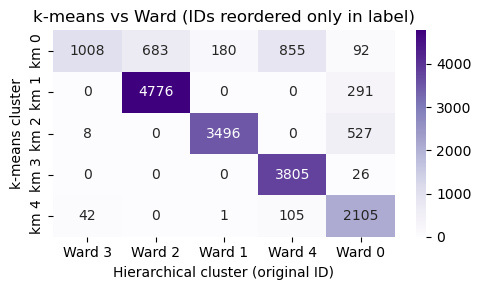

        Algo  k  noise_pct    Sil    DBI        CH    ARI    NMI  Purity
0    k-means  5      0.000  0.329  1.065  6709.777  0.010  0.047   0.066
1     DBSCAN  5      0.606  0.274  1.591  2324.693  0.005  0.031   0.055
2  Hier-Ward  5      0.000  0.302  1.119  5346.508  0.009  0.049   0.065


In [37]:

k_star = 5
labels_hc = fcluster(Z, k_star, criterion='maxclust') - 1 

sil = silhouette_score(df_scaled, labels_hc)
dbi = davies_bouldin_score(df_scaled, labels_hc)
ch  = calinski_harabasz_score(df_scaled, labels_hc)

ari = adjusted_rand_score(true_labels, labels_hc)
nmi = normalized_mutual_info_score(true_labels, labels_hc)

def purity(y_true, y_pred):
    cont = pd.crosstab(y_pred, y_true)
    return np.sum(np.max(cont.values,1)) / len(y_true)

pur = purity(true_labels, labels_hc)

print(f"Ward HC  | Sil={sil:.3f}  DBI={dbi:.3f}  CH={ch:,.0f}  "
      f"ARI={ari:.3f}  NMI={nmi:.3f}  Purity={pur:.3f}")

cm = confusion_matrix(km.labels_, labels_hc, labels=np.arange(k_star))
row_ind, col_ind = linear_sum_assignment(-cm)
map_hg = {col: row for row, col in zip(row_ind, col_ind)}
aligned_hc = np.array([map_hg[c] for c in labels_hc])

acc = accuracy_score(km.labels_, aligned_hc)
print(f"Hungarian-aligned accuracy w.r.t k-means: {acc:.3f}")

cm_aligned = confusion_matrix(km.labels_, aligned_hc, labels=np.arange(k_star))

orig2km = map_hg                           

km2orig = {km_lbl: ward_lbl for ward_lbl, km_lbl in orig2km.items()}

x_ticklabels = [f'Ward {km2orig[k]}' for k in range(k_star)]   

plt.figure(figsize=(5,3))
sns.heatmap(cm_aligned,
            annot=True, fmt='d', cmap='Purples',
            xticklabels=x_ticklabels,              # changed!
            yticklabels=[f'km {k}' for k in range(k_star)])
plt.xlabel('Hierarchical cluster (original ID)')
plt.ylabel('k-means cluster')
plt.title('k-means vs Ward (IDs reordered only in label)'); plt.tight_layout()
plt.show()


metrics_df = metrics_df[metrics_df['Algo'] != 'Hier-Ward']
row_hc = dict(Algo='Hier-Ward', k=k_star, noise_pct=0.0,
              Sil=sil, DBI=dbi, CH=ch, ARI=ari, NMI=nmi, Purity=pur)
metrics_df = pd.concat([metrics_df, pd.DataFrame([row_hc])], ignore_index=True)
print(metrics_df.round(3))
